# About Dataset
This dataset contains **1,000 randomly generated laptop sales transactions**, providing valuable insights into consumer purchasing trends, laptop specifications, and pricing across different regions. It is ideal for data analysis, market research, and machine learning projects related to sales forecasting, customer segmentation, and pricing analysis.

## Dataset Features:
    - Sale ID – A unique identifier for each sale.
    - Brand – The brand of the laptop (e.g., Dell, HP, Apple, Lenovo, Asus, Acer, MSI, Samsung, Razer, Microsoft).
    - Model – A randomly generated model name for variety.
    - Processor – The type of processor (Intel i3, i5, i7, i9, AMD Ryzen 3, 5, 7).
    - RAM (GB) – The amount of RAM in gigabytes (4GB, 8GB, 16GB, 32GB).
    - Storage (GB) – The storage capacity in gigabytes (256GB, 512GB, 1TB, 2TB).
    - Price (USD) – The selling price of the laptop in US dollars, ranging from $400 to $3,000.
    - Purchase Date – The date on which the laptop was purchased, randomly distributed over the past 3 years.
    - City – The city where the purchase was made.
    - Country – The country of purchase.
    - Payment Method – The method used for payment (Credit Card, Debit Card, Cash, UPI, PayPal, Bank Transfer).

In [61]:
!pip3 install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/kgahliso.mokomane/learning-stuff/laptop_sales/laptop_sales.csv")

df.describe()




,Sale ID,RAM (GB),Storage (GB),Price (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,14.420000,958.464000,1661.489860
std,288.819436,10.398256,685.087073,736.705976
min,1.000000,4.000000,256.000000,401.200000
25%,250.750000,4.000000,256.000000,1025.485000
50%,500.500000,8.000000,1024.000000,1618.630000
75%,750.250000,16.000000,1024.000000,2282.887500
max,1000.000000,32.000000,2048.000000,2997.180000


In [63]:
# getting null values
null_vals = df.isnull().sum()


# Check column consistency
column_info = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": null_vals,
    "Unique Values": df.nunique()
})

df.columns = df.columns.str.lower().str.replace(" ","_")

print(df.columns)


Index(['sale_id', 'brand', 'model', 'processor', 'ram_(gb)', 'storage_(gb)',
       'price_(usd)', 'purchase_date', 'city', 'country', 'payment_method'],
      dtype='object')


In [64]:
# data cleaning

df.columns = df.columns.str.lower().str.replace(" ","_")

cols_to_string = {"processor", "brand", "model", "city", "country", "payment_method"}

for col in cols_to_string:
    try:
        # Force conversion to string and handle potential issues (like NaNs or weird values)
        df[col].astype(str)
    except Exception as e:
        print(f"Could not convert column '{col}' to string: {e}")


print(df.dtypes)

sale_id             int64
brand              object
model              object
processor          object
ram_(gb)            int64
storage_(gb)        int64
price_(usd)       float64
purchase_date      object
city               object
country            object
payment_method     object
dtype: object


## Brand analysis

    - identifying popular brands
    - brands by region
    - most diverse cities
    - brand processing power

/var/folders/9n/5fynyxjx6kg06qv7990dy2bw0000gn/T/ipykernel_10138/3794275861.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_count', y='brand', data=popular_brands.head(10), palette='viridis')


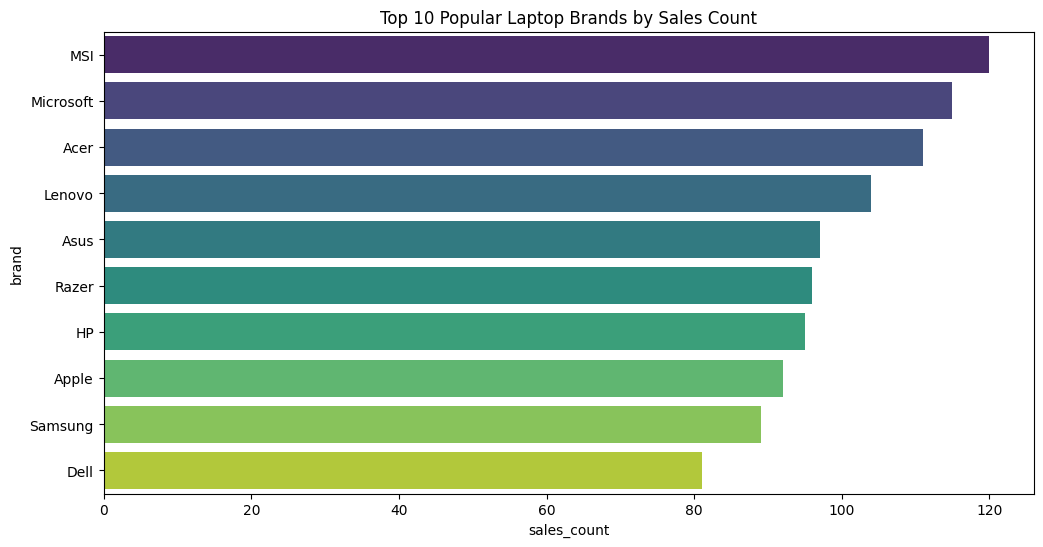

In [65]:
# Most popular brands (Count of occurrences)
popular_brands = df['brand'].value_counts().reset_index()
popular_brands.columns = ['brand', 'sales_count']

# Plotting the most popular brands
plt.figure(figsize=(12, 6))
sns.barplot(x='sales_count', y='brand', data=popular_brands.head(10), palette='viridis')
plt.title("Top 10 Popular Laptop Brands by Sales Count")
plt.xlabel("sales_count")
plt.ylabel("brand")
plt.show()

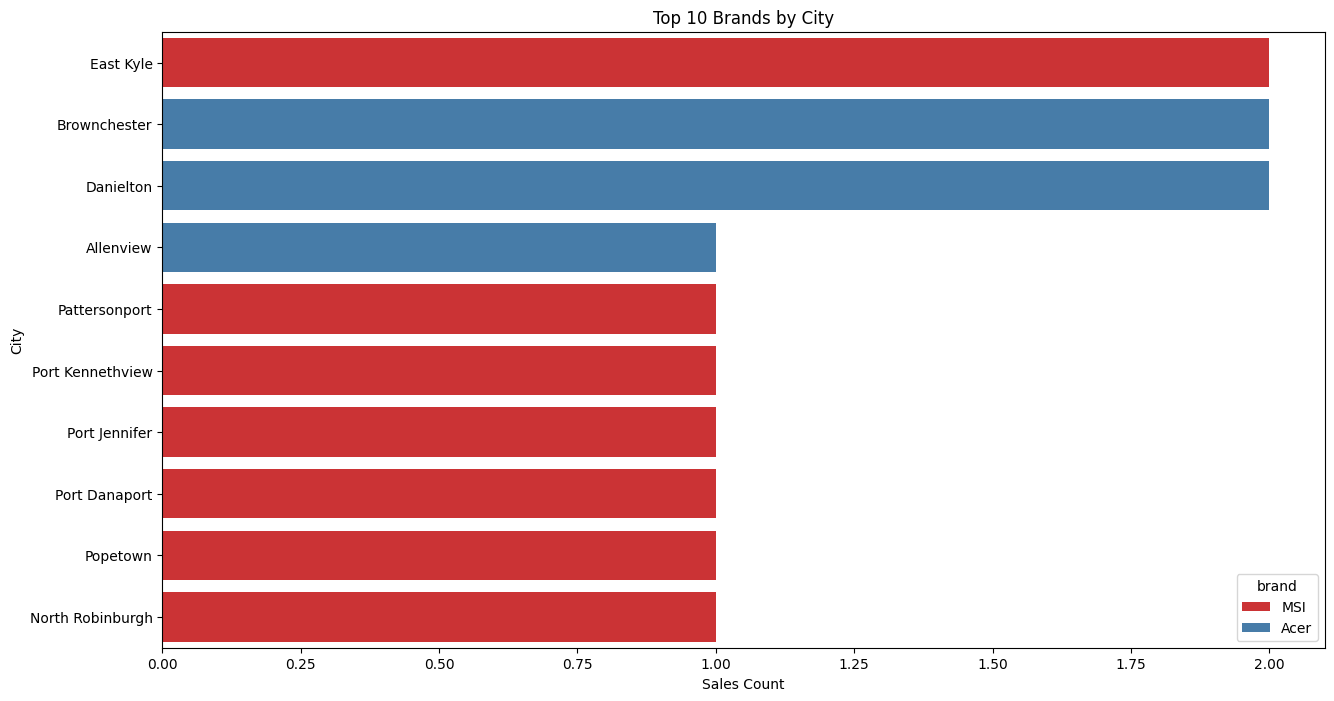

In [66]:
# Sales by brand and city
brand_by_city = df.groupby(['brand', 'city']).size().reset_index(name='sales_count')

# Plotting the top brands by city
plt.figure(figsize=(15, 8))
sns.barplot(x='sales_count', y='city', hue='brand', data=brand_by_city.sort_values(by='sales_count', ascending=False).head(10), palette='Set1')
plt.title("Top 10 Brands by City")
plt.xlabel("Sales Count")
plt.ylabel("City")
plt.show()

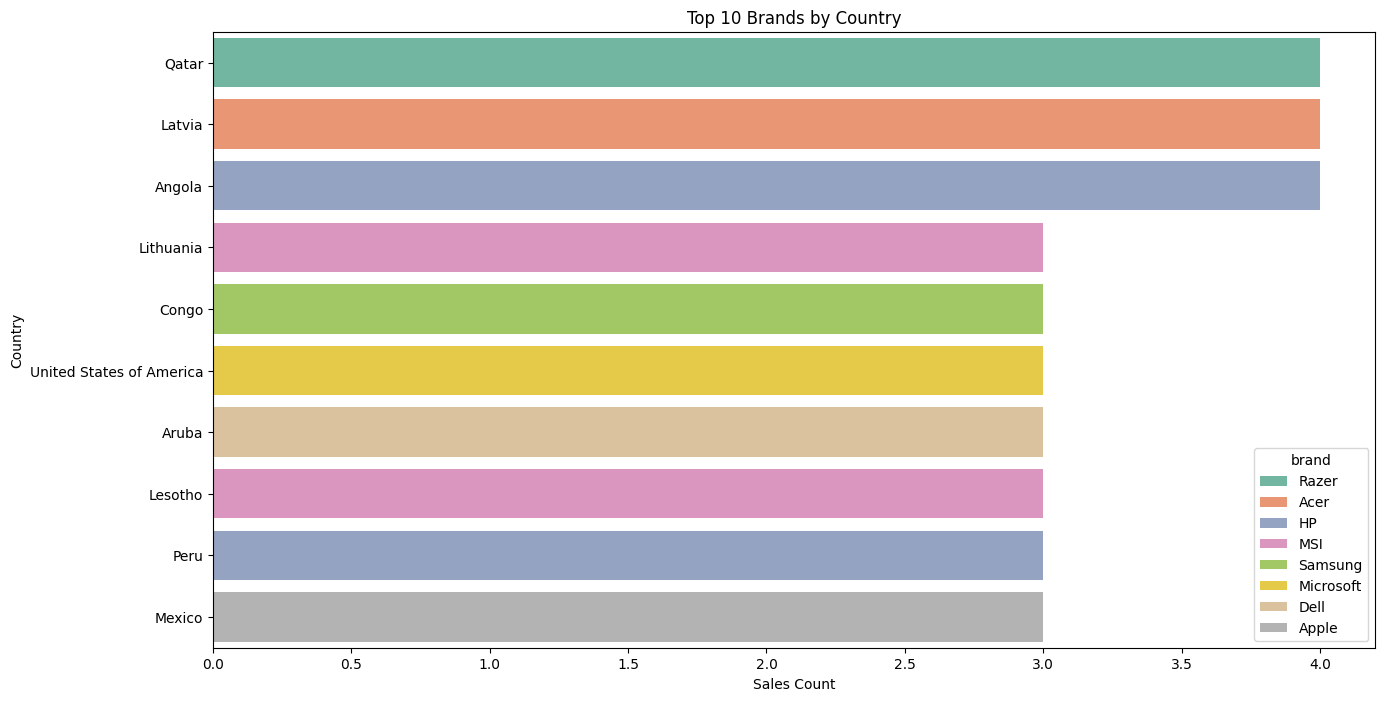

In [67]:
# Sales by brand and country
brand_by_country = df.groupby(['brand', 'country']).size().reset_index(name='sales_count')

# Plotting the top brands by country
plt.figure(figsize=(15, 8))
sns.barplot(x='sales_count', y='country', hue='brand', data=brand_by_country.sort_values(by='sales_count', ascending=False).head(10), palette='Set2')
plt.title("Top 10 Brands by Country")
plt.xlabel("Sales Count")
plt.ylabel("Country")
plt.show()


/var/folders/9n/5fynyxjx6kg06qv7990dy2bw0000gn/T/ipykernel_10138/3235022547.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_unique_brands', y='city', data=diverse_cities_sorted.head(10), palette='coolwarm')


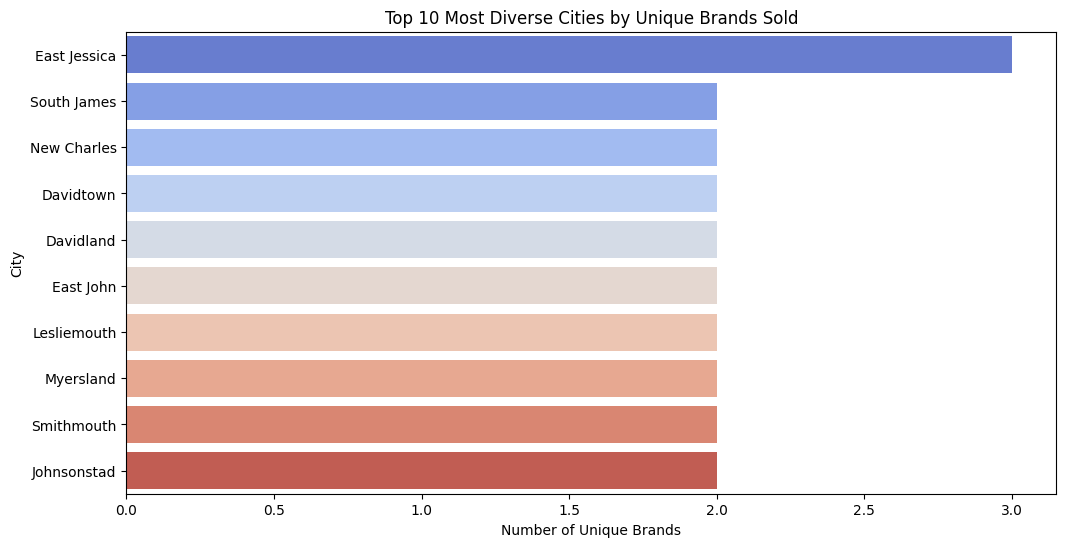

In [68]:
# Counting the number of unique brands per city
diverse_cities = df.groupby('city')['brand'].nunique().reset_index(name='num_unique_brands')

# Sorting by the most diverse cities
diverse_cities_sorted = diverse_cities.sort_values(by='num_unique_brands', ascending=False)

# Plotting the most diverse cities
plt.figure(figsize=(12, 6))
sns.barplot(x='num_unique_brands', y='city', data=diverse_cities_sorted.head(10), palette='coolwarm')
plt.title("Top 10 Most Diverse Cities by Unique Brands Sold")
plt.xlabel("Number of Unique Brands")
plt.ylabel("City")
plt.show()


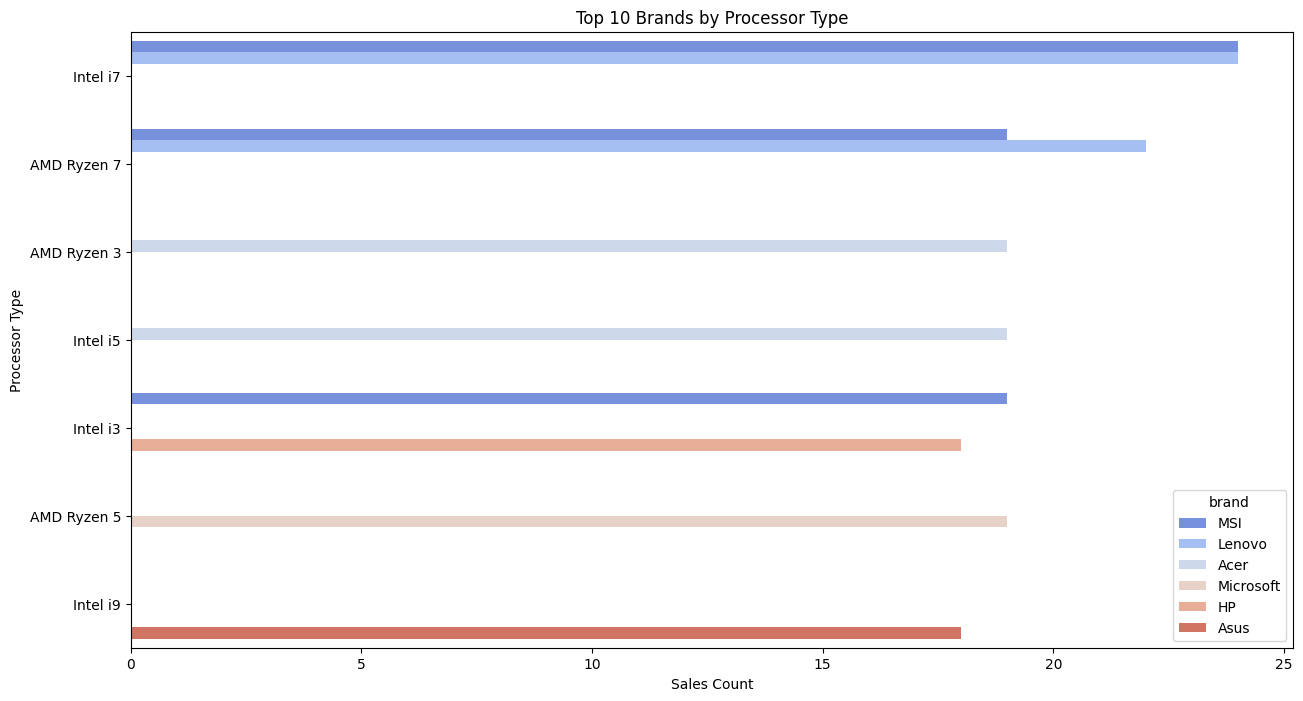

In [69]:
# Sales by brand and processor type
brand_by_processor = df.groupby(['brand', 'processor']).size().reset_index(name='sales_count')

# Plotting the brand and processor distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='sales_count', y='processor', hue='brand', data=brand_by_processor.sort_values(by='sales_count', ascending=False).head(10), palette='coolwarm')
plt.title("Top 10 Brands by Processor Type")
plt.xlabel("Sales Count")
plt.ylabel("Processor Type")
plt.show()


In [70]:
# Configuration analysis by city-country (group by processor, RAM, storage)
config_by_region = df.groupby(['city', 'country', 'processor', 'ram_(gb)', 'storage_(gb)']).size().reset_index(name='sales_count')

# Sorting by sales_count to get the most popular configurations in each city-country combination
config_by_region_sorted = config_by_region.sort_values(by='sales_count', ascending=False)

# Displaying top 5 configurations for each city and country
top_config_per_region = config_by_region_sorted.groupby(['city', 'country']).head(5)

# Display the top configurations for each city-country
top_config_per_region


,city,country,processor,ram_(gb),storage_(gb),sales_count
0,Aaronton,Saint Pierre and Miquelon,Intel i5,16,512,1
671,Port Jenniferview,Germany,Intel i7,8,256,1
658,Port Daryl,Bangladesh,Intel i9,8,512,1
659,Port Deanchester,Jordan,Intel i7,4,256,1
660,Port Derrick,Taiwan,AMD Ryzen 7,8,256,1
...,...,...,...,...,...,...
338,Lake Andrewland,Saint Helena,Intel i7,32,512,1
339,Lake Arthurhaven,Northern Mariana Islands,Intel i7,16,1024,1
340,Lake Benjamin,Cuba,Intel i5,32,512,1
341,Lake Benjamin,Liechtenstein,AMD Ryzen 7,8,256,1


In [71]:
# Brand by city-country (group by city, country, and brand)
brand_by_region = df.groupby(['city', 'country', 'brand']).size().reset_index(name='sales_count')

# Sorting by sales_count to get the top brands in each city-country combination
brand_by_region_sorted = brand_by_region.sort_values(by='sales_count', ascending=False)

# Displaying top 5 brands for each city-country
top_brands_per_region = brand_by_region_sorted.groupby(['city', 'country']).head(5)

# Display the top brands for each city-country
top_brands_per_region


,city,country,brand,sales_count
0,Aaronton,Saint Pierre and Miquelon,HP,1
671,Port Jenniferview,Germany,Microsoft,1
658,Port Daryl,Bangladesh,Lenovo,1
659,Port Deanchester,Jordan,Lenovo,1
660,Port Derrick,Taiwan,Acer,1
...,...,...,...,...
338,Lake Andrewland,Saint Helena,Dell,1
339,Lake Arthurhaven,Northern Mariana Islands,Lenovo,1
340,Lake Benjamin,Cuba,Microsoft,1
341,Lake Benjamin,Liechtenstein,Lenovo,1


/var/folders/9n/5fynyxjx6kg06qv7990dy2bw0000gn/T/ipykernel_10138/3630927097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Count', y='Country', data=sales_by_country.head(10), palette='plasma')


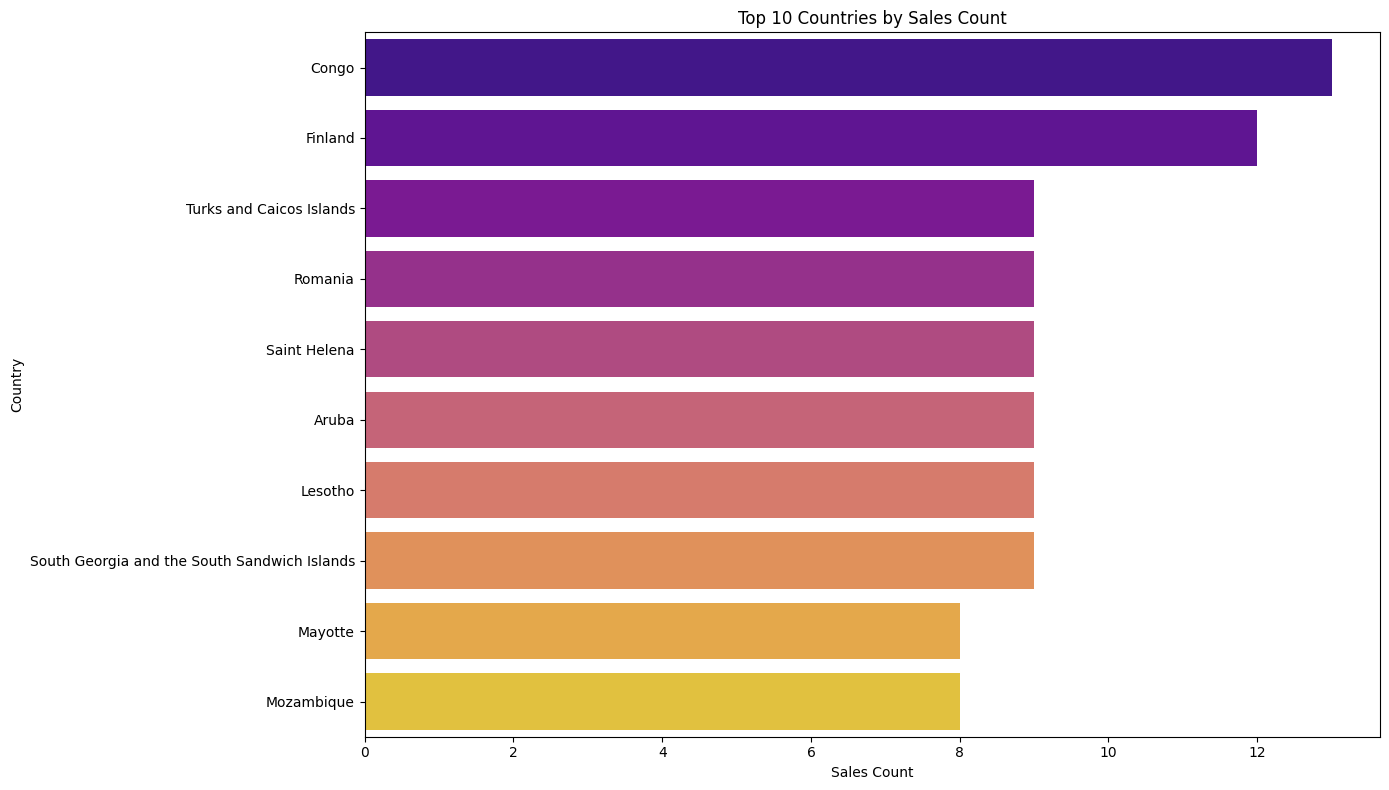

In [72]:
# Sales count by country
sales_by_country = df['country'].value_counts().reset_index()
sales_by_country.columns = ['Country', 'Sales Count']

# Plotting the top 10 countries by sales
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales Count', y='Country', data=sales_by_country.head(10), palette='plasma')
plt.title("Top 10 Countries by Sales Count")
plt.xlabel("Sales Count")
plt.ylabel("Country")
plt.tight_layout()  # To make sure the labels are spaced properly
plt.show()


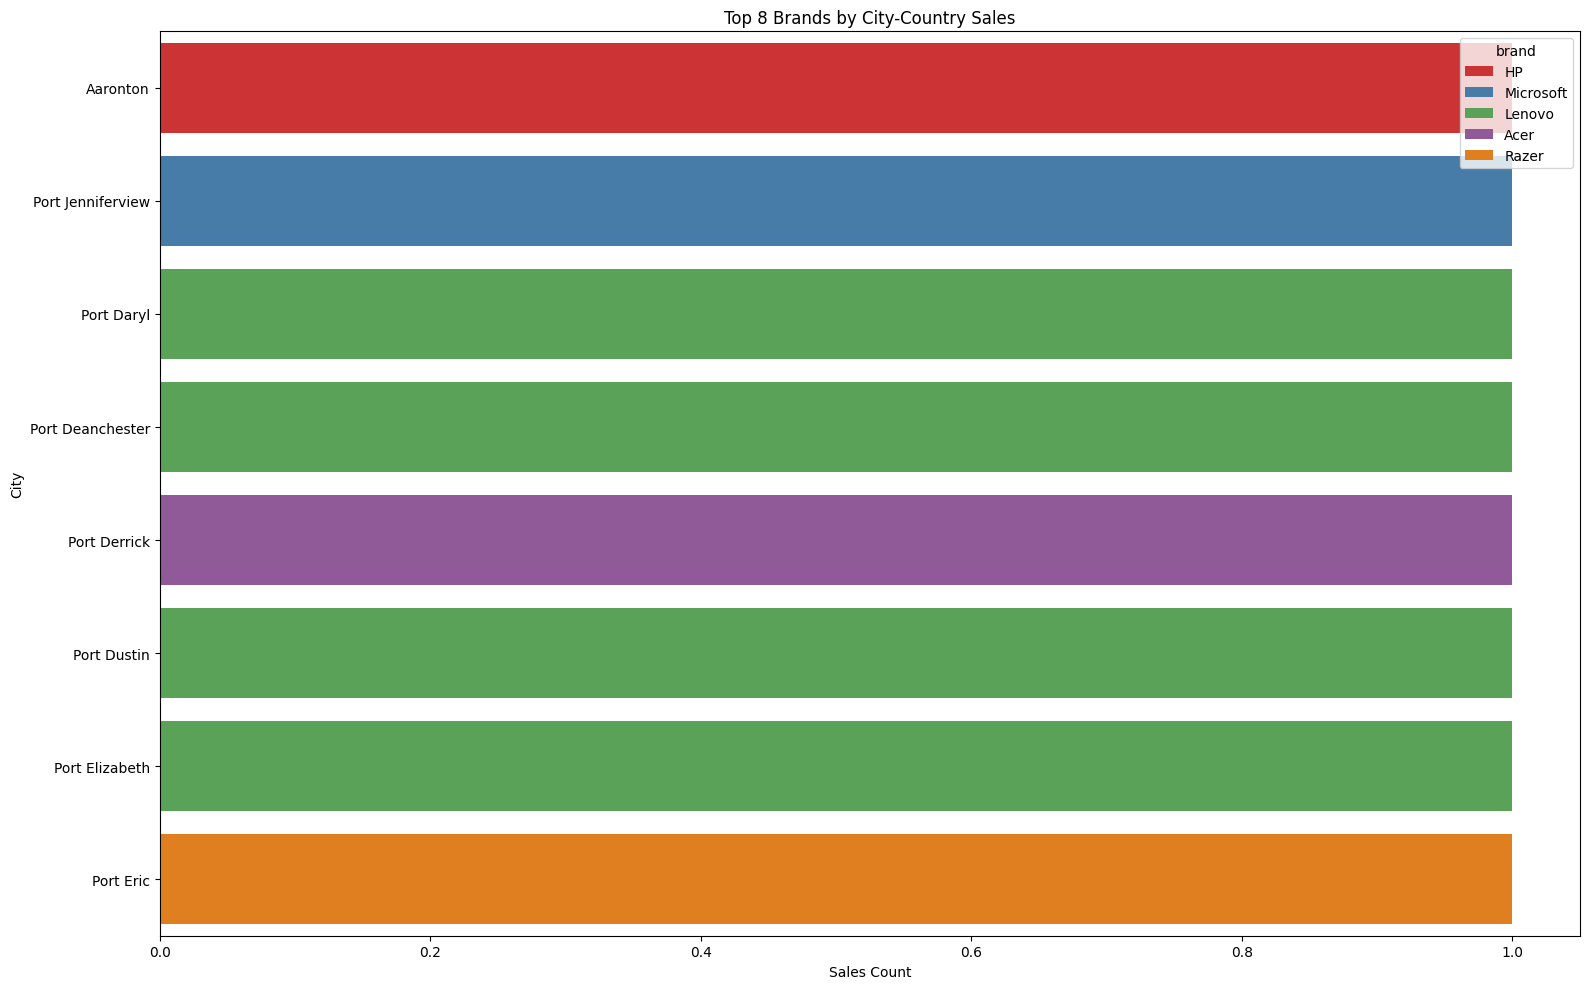

In [73]:
# Sales count by brand, city, and country
brand_by_region = df.groupby(['city', 'country', 'brand']).size().reset_index(name='sales_count')

# Sort by sales count and get the top 8 regions (city-country)
top_8_regions_brands = brand_by_region.sort_values(by='sales_count', ascending=False).head(8)

# Plotting top 8 brands by city-country
plt.figure(figsize=(16, 10))
sns.barplot(x='sales_count', y='city', hue='brand', data=top_8_regions_brands, palette='Set1')
plt.title("Top 8 Brands by City-Country Sales")
plt.xlabel("Sales Count")
plt.ylabel("City")
plt.tight_layout()  # Ensure labels are well spaced
plt.show()


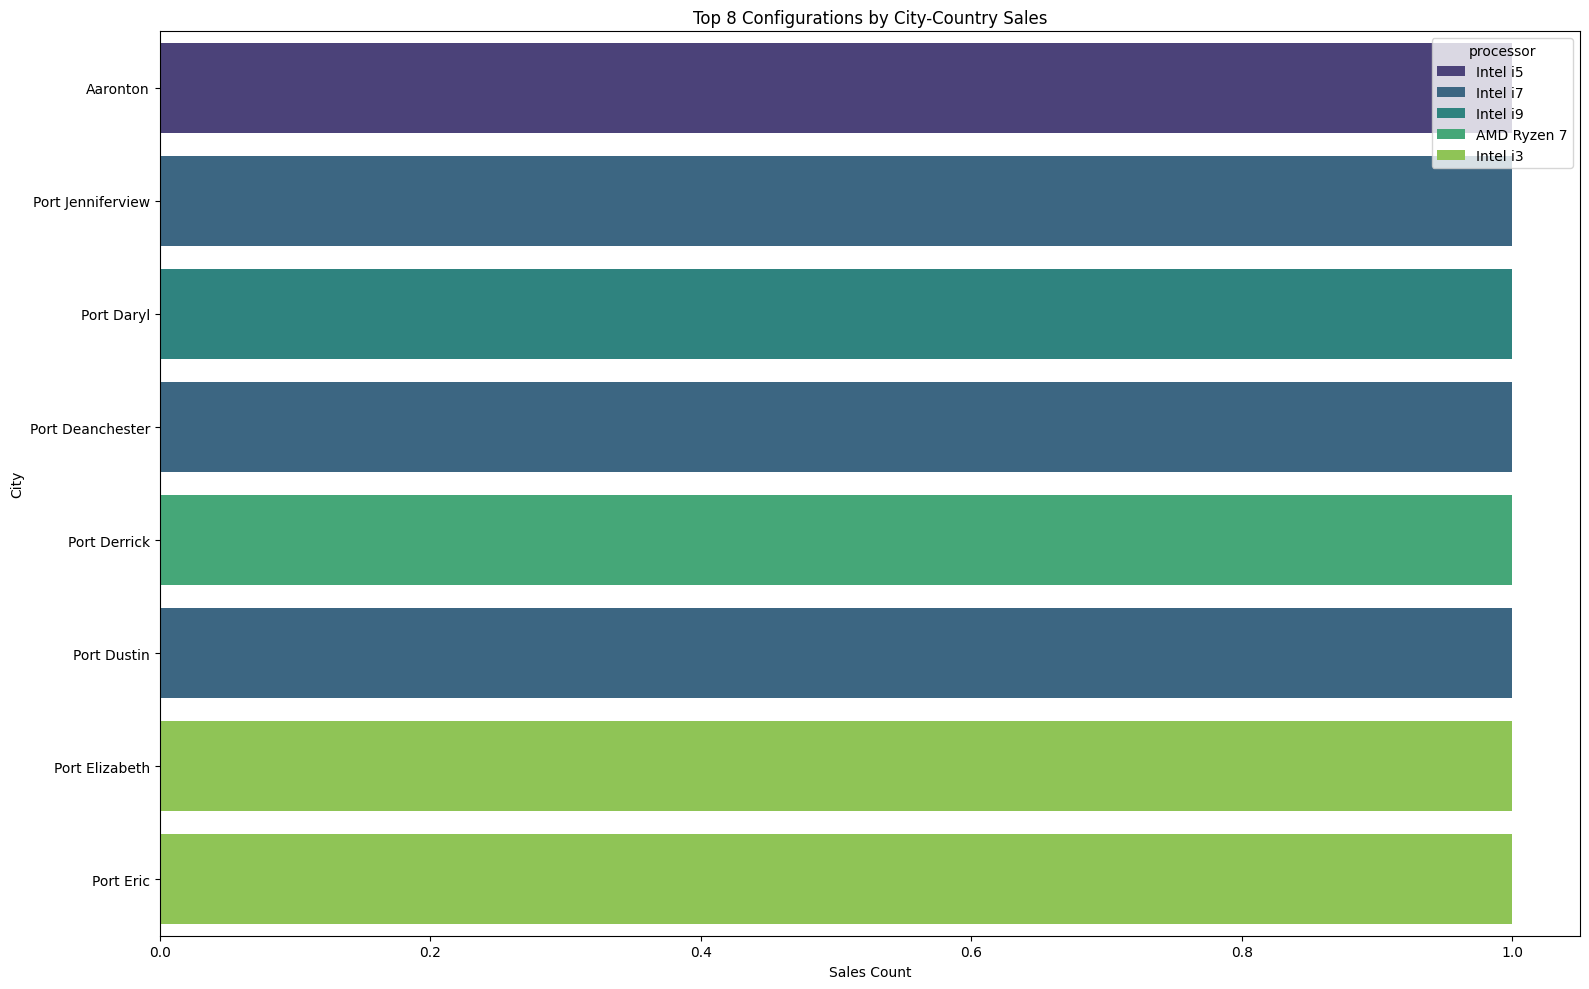

In [74]:
# Sales count by configuration, city, and country
config_by_region = df.groupby(['city', 'country', 'processor', 'ram_(gb)', 'storage_(gb)']).size().reset_index(name='sales_count')

# Sort by sales count and get the top 8 regions (city-country)
top_8_regions_config = config_by_region.sort_values(by='sales_count', ascending=False).head(8)

# Plotting top 8 configurations by city-country
plt.figure(figsize=(16, 10))
sns.barplot(x='sales_count', y='city', hue='processor', data=top_8_regions_config, palette='viridis')
plt.title("Top 8 Configurations by City-Country Sales")
plt.xlabel("Sales Count")
plt.ylabel("City")
plt.tight_layout()  # Ensure labels are well spaced
plt.show()


## Key insights from **BRAND ANALYSIS**

    - 